/tmp/ipython-input-4224129518.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_df.fillna(method='bfill', inplace=True)
/tmp/ipython-input-4224129518.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_df.fillna(method='ffill', inplace=True)  # Extra safety
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

None

🚀 Starting training...

Epoch 1/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6494 - loss: 0.6421 - val_accuracy: 0.7273 - val_loss: 0.5289 - learning_rate: 0.0010
Epoch 2/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7432 - loss: 0.4674 - val_accuracy: 0.7273 - val_loss: 0.5027 - learning_rate: 0.0010
Epoch 3/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7843 - loss: 0.4412 - val_accuracy: 0.7403 - val_loss: 0.5021 - learning_rate: 0.0010
Epoch 4/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7957 - loss: 0.4296 - val_accuracy: 0.7403 - val_loss: 0.5045 - learning_rate: 0.0010
Epoch 5/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7990 - loss: 0.4192 - val_accuracy: 0.7403 - val_loss: 0.5127 - learning_rate: 0.0010
Epoch 6/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8018 - loss: 0.4126 - val_accuracy: 0.7403 - val_loss: 0.5180 - learning_rate: 0.0010
Epoch 7/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 

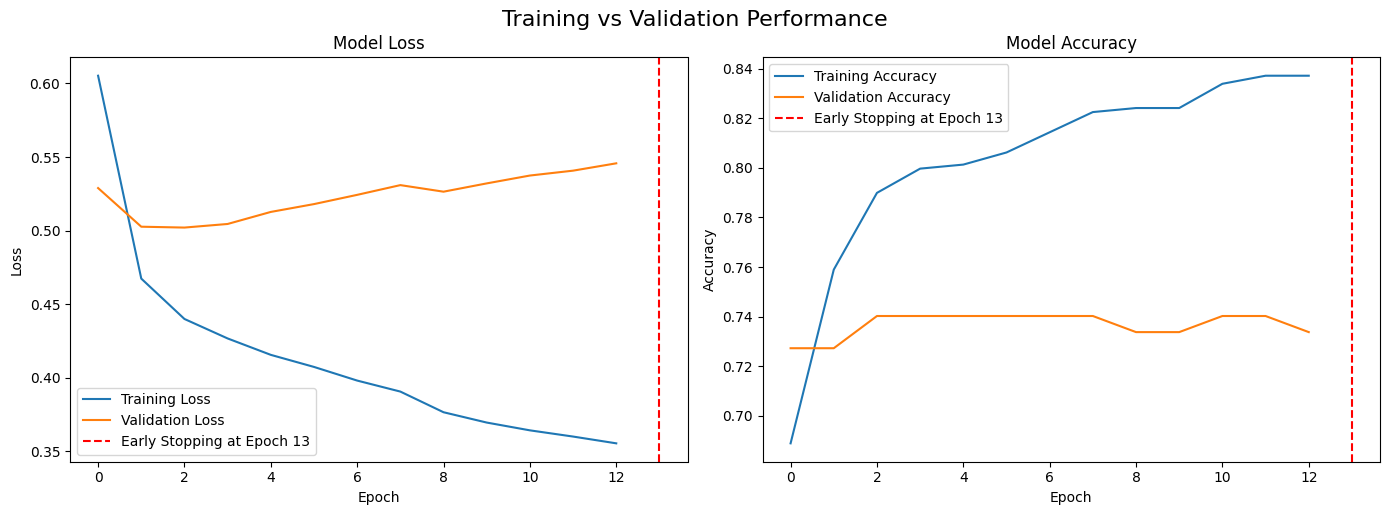


✅ Final Test Accuracy: 0.7403
✅ Final Test Loss: 0.5021


In [2]:
# early_stopping_demo.py
# Binary classification with Early Stopping to prevent overfitting
# Uses Pima Indians Diabetes dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# ----------------------------
# 1. Load and Preprocess Data
# ----------------------------
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Separate features and target
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Replace zeros with NaN (since 0 in some columns is invalid)
X_df = pd.DataFrame(X, columns=column_names[:-1])
X_df.replace(0, np.nan, inplace=True)

# Fill missing values using forward and backward fill
X_df.fillna(method='bfill', inplace=True)
X_df.fillna(method='ffill', inplace=True)  # Extra safety

X = X_df.values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------------------------
# 2. Build Overfitting-Prone Model
# ----------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(8,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary
print(model.summary())

# ----------------------------
# 3. Define Callbacks
# ----------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    mode='min',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

# ----------------------------
# 4. Train Model
# ----------------------------
print("\n🚀 Starting training...\n")
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Get the epoch where training was stopped
stopped_epoch = early_stopping.stopped_epoch + 1  # stopped_epoch is 0-indexed
print(f"\n✅ Training stopped at epoch {stopped_epoch} due to early stopping.")
print(f"   Best model weights restored from epoch {stopped_epoch - early_stopping.patience}.")

# ----------------------------
# 5. Plot Results
# ----------------------------
def plot_training_history(history, stopped_epoch):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Loss
    ax[0].plot(history.history['loss'], label='Training Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Model Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    if stopped_epoch > 0:
        ax[0].axvline(stopped_epoch, color='red', linestyle='--', label=f'Early Stopping at Epoch {stopped_epoch}')
        ax[0].legend()

    # Accuracy
    ax[1].plot(history.history['accuracy'], label='Training Accuracy')
    ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[1].set_title('Model Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    if stopped_epoch > 0:
        ax[1].axvline(stopped_epoch, color='red', linestyle='--', label=f'Early Stopping at Epoch {stopped_epoch}')
        ax[1].legend()

    plt.tight_layout()
    plt.suptitle('Training vs Validation Performance', fontsize=16, y=1.02)
    plt.show()

plot_training_history(history, stopped_epoch)

# ----------------------------
# 6. Evaluate Final Model
# ----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f}")
print(f"✅ Final Test Loss: {test_loss:.4f}")